Dans la première partie, nous avons vu les rudiments de l'affichage de matplotlib et exploré un tout petit peu les possibilité de seaborn en changeant le thème de notre graphique.

### Buts du TP 
- Voir et réaliser un diagramme en bâtons
- Voir et réaliser un diagramme circulaire (appelé aussi camembert)
- Voir et réaliser un diagramme nuage de points
- Voir et réaliser un diagramme histogramme

Mais avant, on commence par installer nos bibliothèques, celles indispensables à la réalisation de nos graphiques.

In [3]:
# On importe seaborn et matplotlib vu que nous allons l'utiliser
import seaborn as sns
import matplotlib.pyplot as plt

# Et on importe toujours pandas et numpy
import pandas as pd

# Diagramme en bâtons (bar chart)

Le diagramme en bâtons (ou barre) est idéal pour comparer des données. Il permet de montrer la relation entre une donnée numérique et une donnée catégorique. Par exemple réparition du temps en fonction des activités. Le diagramme en barres existe sous quatre formes :
- Diagramme en barres (position horizontale)
- Diagramme en colonnes (position verticale)
- Diagramme en barres empilées (position horizontale)
- Diagramme en colonnes empilées (position verticale)

Notez également qu'il est possible de grouper nos barres dépendamment du type de graphique que vous utilisez.

In [4]:
sns.set_style('darkgrid')

liste_matieres = [
    'Mathématiques', 'Français', 
    'Histoire-Géographie', 'Physique Chimie', 
    "EPS", "LV1", 
    "LV2", "Philosophie"
]
liste_notes = [10, 15, 13, None, 15, 12, 17, 8]

bulletin_de_notes_df = pd.DataFrame.from_dict({
    "matières": liste_matieres,
    "notes": liste_notes,
})

## Données manquantes

Dans les précédents TP, nous avons travaillé avec des DataFrame qui avaient, parfois, des données manquantes. Nous avions procédés à la suppression de la ligne (ou colonne) associée. Mais parfois, ce n'est pas ce que nous vous voulons. En enseignants très cléments, nous allons donner une note pour la matière de physique chimie, basée sur la moyenne des autres notes, généreux. Nous sommes d'autant plus obligé car les graphiques n'aiment pas trop les données incorrectes surtout pour les chiffres.

Pour ce faire, nous allons utiliser la méthode `fillna()` (fill non available - value - / remplir les variables non présentes / valides) et lui passer comme paramètre la moyenne des valeurs de la colonne "notes", en utilisant la méthode `.mean()`.
Nous aurions pu être plus généreux en mettant la note max `.max()`, plus sévère en mettant la note min `.min()`, ou au milieu mettant la note médiane `.median()`.

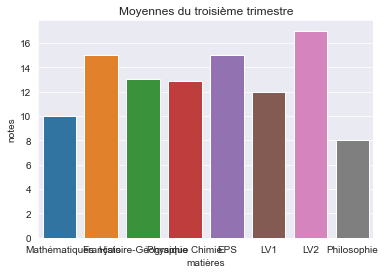

In [17]:
# Le barplot n'aime pas trop les variables manquantes, au lieu de supprimer la matière incriminée
# Nous allons lui attribuer comme note la moyenne des notes autres matières 
bulletin_de_notes_df["notes"].fillna((
    # On arrondi aux deux dernières décimales
    round(
        # On fait la moyenne des valeurs de la colonne "notes"
        bulletin_de_notes_df["notes"].mean(), 
    2)

# On précise inplace=True pour faire muter le DataFrame
), inplace=True)

# Cette fois-ci on va utiliser seaborn
# barplot prend en paramètres : 
# - x = des variables qualitatives (ou catégorielle souvent des chaînes de caractères)
# - y = des variables quantitatives (des nombres en somme)
sns.barplot(x = "matières", y = "notes", data=bulletin_de_notes_df)
plt.title(
    f'Moyennes du troisième trimestre',
)
plt.show()

##### Qu'observez-vous ?

A partir de là, nous avons deux choix :
- Soit incliner nos labels
- Soit passer notre graphique en horizontal

Essayons les deux !

###### Incliner nos labels

Pour incliner nos labels, nous allons devoir jouer sur la méthode `.xticks()` et lui passer en paramètre le degré de rotation voulu pour nos `xticks`, grâce à la propriété `rotation`. Pour rappel, voici en détails l'anatomie d'un graphique.
![Anatomy graphique matplotlib](https://raw.githubusercontent.com/DanYellow/cours/main/big-data-s4/travaux-pratiques/numero-7/ressources/_images/anatomy.png)

- [Voir l'anatomie d'un graphique](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

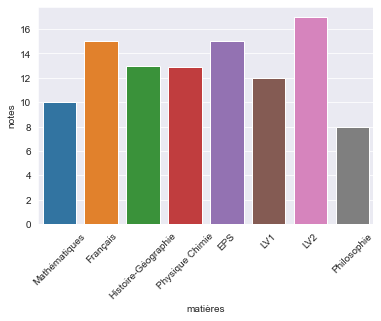

In [6]:
sns.barplot(x = "matières", y = "notes", data=bulletin_de_notes_df)
plt.xticks(rotation=45)
plt.show()

##### Qu'observez-vous ?

###### Passer notre graphique en horizontal

Pour rappel, la méthode `barplot()` de seaborn accepte pour paramètres x et y une variable quantitative, et une qualitative respective. Ainsi, si on inverse les deux, eh bien, notre graphique sera horizontal. Essayez !

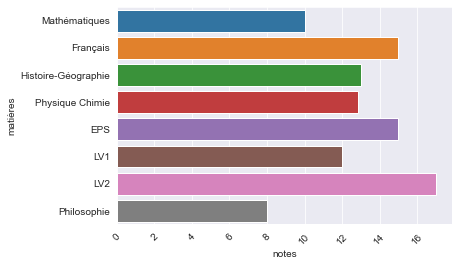

In [7]:
# Reprenez le graphique du dessus (inutile de prendre la partie relative à xticks)
# Remplacez x par y, et y par x

# Diagramme circulaire ou camenbert (bar chart)

Subtituable au digramme en bâton, le diagramme circulaire nous permet d'afficher un **petit nombre de valeurs**. Dans le cas précédent, notre nombre de données est assez conséquent. Par ailleurs, pour être suffisamment lisible, chaque portion doit avoir une certaine taille, bien évidemment une légende est préférable pour être plus compréhensible.

A choisir entre le diagramme circulaire et le diagramme en bâtons préférez le second, moins élégant certes, mais beaucoup plus lisible. Cette fois-ci, nous allons utiliser matplotlib et non seaborn.

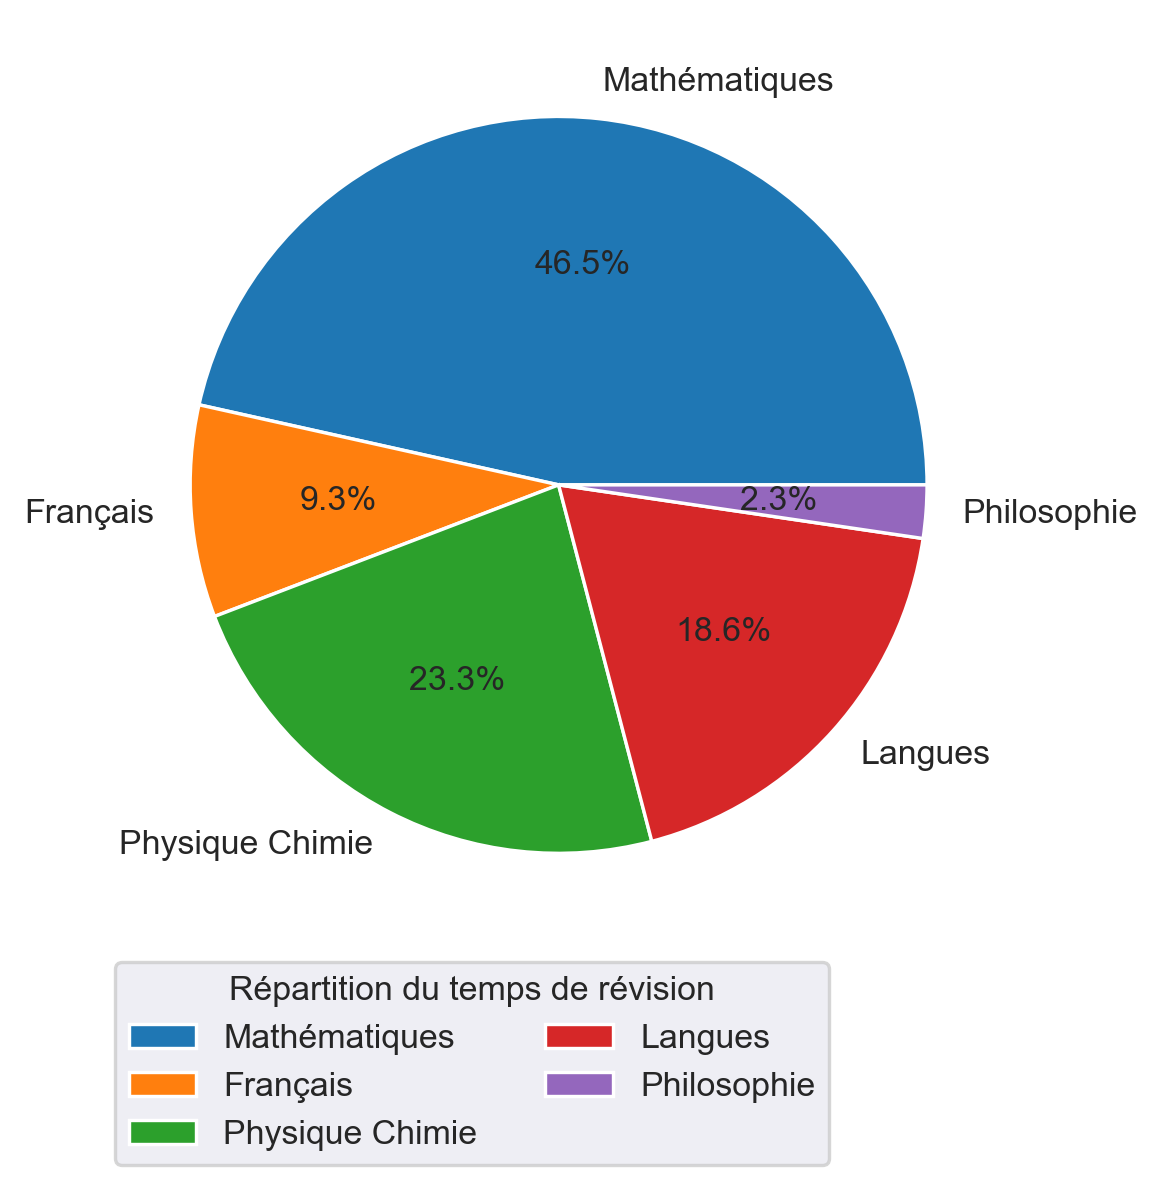

In [48]:
temps_revisions_df = pd.DataFrame.from_dict({
    "matieres": ["Mathématiques", "Français", "Physique Chimie", "Langues", "Philosophie"],
    "temps": [10, 2, 5, 4, .5],
})

plt.figure(figsize=(5, 5), dpi=244)
plt.pie(
    # On définit notre colonne (Serie) contenant nos valeurs numériques
    x = temps_revisions_df['temps'], 
    # On définit le format d'affichage des données 
    # En absence de ce paramètre, notre diagramme n'aura pas de valeur afichée
    # Il sera donc difficielement compréhensible
    autopct = "%.1f%%", 
    # On définit nos labels
    labels = temps_revisions_df['matieres']
)
# On ajoute une légende pour que ça soit encore plus clair
plt.legend(
    # Définit le titre de la légende et la position
    title='Répartition du temps de révision', 
    loc='upper left',
    # Définit le nombre de colonnes et le décalage de position
    ncol=2,
    bbox_to_anchor=(0, 0)
)
# - Documentation : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

N'oubliez pas de sauvergarder sous forme de image vos graphiques, ça peut être utile pour illustrer vos articles. Il faut utiliser la commande `fig.savefig()`, regardez la première partie du TP pour plus d'informations.

Bien, nous avons fait un diagramme en bâtons pour afficher les données de notre bulletin de notes et un autre pour montrer la répartition du temps, ça pourrait être intéressant de les mettre côte à côte. On pourrait effectivement sauvegarder les images puis les fusionner dans un logiciel comme Photoshop, mais nous allons être plus malins et utiliser, encore une fois, matplotlib et les `subplots`.

## Vues multiples / subplots

La méthode `subplots`, permet de définir une grille de vues, et ensuite d'ajouter nos graphiques. Par exemple :
```python
fig, liste_axes = plt.subplots(nrows = 2, ncols = 3, figsize=(40, 8), dpi=144)
```
- [Documentation de la méthode subplots](https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=subplots#matplotlib.pyplot.subplots)

Dans le code ci-dessus, nous avons défini une grille de deux lignes (`nrows`) et trois colonnes (`ncols`).

| graphique1 | graphique2 | graphique3 |
|------------|------------|------------|
| graphique4 | graphique5 | graphique6 |

Mais pour notre exemple, nous allons définir une colonne de deux lignes (`nrows = 2, ncols = 1`), ou une ligne de deux colonnes (`nrows = 1, ncols = 2`), à vous de voir.

On remarque également que `subplots()` retourne deux valeurs :
- fig, un objet de la classe Figure. Nous l'avons déjà vu auparavant
- liste_axes, un tableau de deux dimensions (sauf si c'est grille à une ligne) d'instance de l'objet AxesSubplot

Si on affiche le contenu de liste_axes (avec les paramètres ci-dessus), on obtient quelques chose comme ceci :
```python
array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)
```

Essayons tout ça.

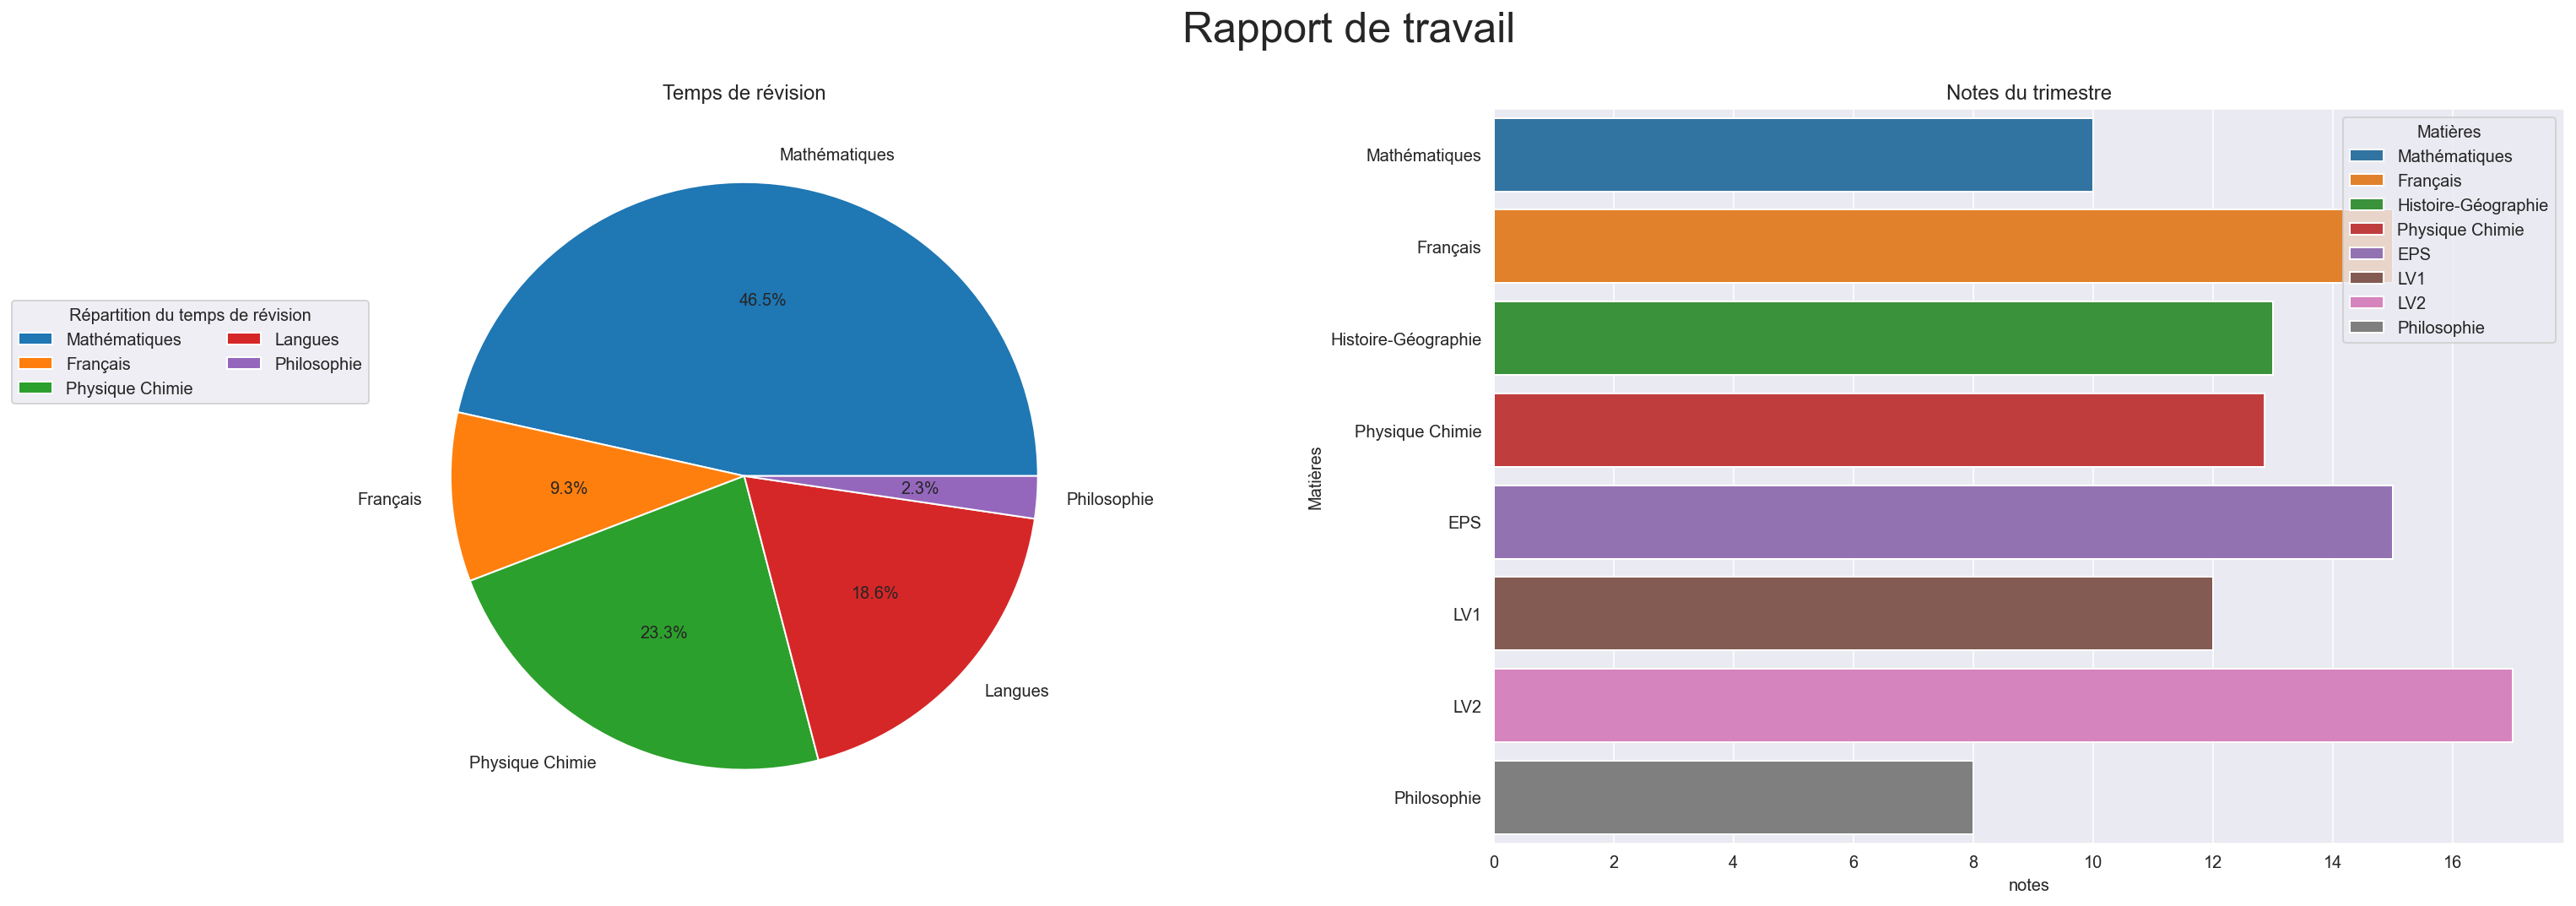

In [147]:
# Mettez les valeurs que nous souhaitez pour votre grille
# Attention, si vous mettez plus d'une ligne, 
# le tableau deviendra un tableau à deux dimensions
fig, liste_axes = plt.subplots(nrows = 1, ncols = 2, figsize=(25, 8), dpi=144)
display(liste_axes)

liste_axes[0].pie(
    x=temps_revisions_df['temps'], 
    autopct="%.1f%%", 
    labels=temps_revisions_df['matieres']
)

liste_axes[0].legend(
    title='Répartition du temps de révision', 
    loc='upper right',
    ncol=2,
    bbox_to_anchor=(0, .75)
)
liste_axes[0].set_title('Temps de révision')

sns.barplot(y = "matières", x = "notes", data=bulletin_de_notes_df, 
    # Avec seaborn, on utilise la propriété "ax" 
    # pour indiquer où est-ce qu'on veut afficher notre graphique
    ax=liste_axes[1],
    # Les deux lignes suivantes permettent de forcer l'affichage correct
    # de la légende
    hue="matières",
    dodge=False
)
liste_axes[1].set_ylabel("Matières")
liste_axes[1].set_title('Notes du trimestre')
liste_axes[1].legend(title="Matières")

# titre de notre ensemble de graphiques
plt.suptitle('Rapport de travail', size=25)

plt.show()

On remarque plusieurs choses suite à notre ensemble de graphiques :
- On n'utilise plus fig/plt pour définir les caractéristiques de chaque graphique, mais le subplot associé à notre graphique
- 

- Note : Nous avons forcé l'emplacement des axes grâce à subplot. Il est possible de créer des axes qui vont "flotter" dans votre figure
- Note 2 : subplots est relativement limité, sa mise en page est très basique. Il existe GridSpec pour réaliser des grilles plus poussées. [Voir la documentation de GridSpec](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html)